In [2]:
from __future__ import division
from __future__ import print_function

## An adjacency list graph object

Directed graph represented as a list of edges where each edge is a tuple (source_node_index, destination_node_index)

In [3]:
class BasicGraph:
    def __init__(self, vlist=[]):
        """ Initialize a Graph with an optional vertex list """
        self.index = {v:i for i,v in enumerate(vlist)}    # looks up index given name
        self.vertex = {i:v for i,v in enumerate(vlist)}   # looks up name given index
        self.edge = []
        self.edgelabel = []
        
    def addVertex(self, label):
        """ Add a labeled vertex to the graph """
        index = len(self.index)
        self.index[label] = index
        self.vertex[index] = label
        
    def addEdge(self, vsrc, vdst, label='', repeats=True):
        """ Add a directed edge to the graph, with an optional label. 
        Repeated edges are distinct, unless repeats is set to False. """
        e = (self.index[vsrc], self.index[vdst])
        if (repeats) or (e not in self.edge):
            self.edge.append(e)
            self.edgelabel.append(label)

## A Usage Example

In [16]:
import itertools

# build a list of binary number "strings"
binary = [''.join(t) for t in itertools.product('01', repeat=4)]

print(binary)

# build a graph with edges connecting binary strings where
# the k-1 suffix of the source vertex matches the k-1 prefix
# of the destination vertex
G1 = BasicGraph(binary)
for vsrc in binary:
    G1.addEdge(vsrc, vsrc[1:]+'0')
    G1.addEdge(vsrc, vsrc[1:]+'1')

print()
print("Vertex indices = ", G1.index)
print()
print("Index to Vertex = ", G1.vertex)
print()
print("Edges =", G1.edge)

for i, (src, dst) in enumerate(G1.edge):
    print("%2d: %s --> %s" % (i, G1.vertex[src], G1.vertex[dst]), end="  ")
    if (i % 4 == 3):
        print()

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']

Vertex indices =  {'0110': 6, '0111': 7, '0000': 0, '0001': 1, '0011': 3, '0010': 2, '0101': 5, '0100': 4, '1111': 15, '1110': 14, '1100': 12, '1101': 13, '1010': 10, '1011': 11, '1001': 9, '1000': 8}

Index to Vertex =  {0: '0000', 1: '0001', 2: '0010', 3: '0011', 4: '0100', 5: '0101', 6: '0110', 7: '0111', 8: '1000', 9: '1001', 10: '1010', 11: '1011', 12: '1100', 13: '1101', 14: '1110', 15: '1111'}

Edges = [(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (4, 9), (5, 10), (5, 11), (6, 12), (6, 13), (7, 14), (7, 15), (8, 0), (8, 1), (9, 2), (9, 3), (10, 4), (10, 5), (11, 6), (11, 7), (12, 8), (12, 9), (13, 10), (13, 11), (14, 12), (14, 13), (15, 14), (15, 15)]
 0: 0000 --> 0000   1: 0000 --> 0001   2: 0001 --> 0010   3: 0001 --> 0011  
 4: 0010 --> 0100   5: 0010 --> 0101   6: 0011 --> 0110   7: 0011 --> 0111  
 8: 0100 --> 1000   9:

# All vertex permutations &equals; *every* possible path

In [17]:
import itertools

start = 1
for path in itertools.permutations([1,2,3,4]):
    if (path[0] != start):
        print()
        start = path[0]
    print(path, end=', ')

(1, 2, 3, 4), (1, 2, 4, 3), (1, 3, 2, 4), (1, 3, 4, 2), (1, 4, 2, 3), (1, 4, 3, 2), 
(2, 1, 3, 4), (2, 1, 4, 3), (2, 3, 1, 4), (2, 3, 4, 1), (2, 4, 1, 3), (2, 4, 3, 1), 
(3, 1, 2, 4), (3, 1, 4, 2), (3, 2, 1, 4), (3, 2, 4, 1), (3, 4, 1, 2), (3, 4, 2, 1), 
(4, 1, 2, 3), (4, 1, 3, 2), (4, 2, 1, 3), (4, 2, 3, 1), (4, 3, 1, 2), (4, 3, 2, 1), 

## A Hamiltonian Path Algorithm

In [18]:
import itertools

class EnhancedGraph(BasicGraph):
    def hamiltonianPath(self):
        """ A Brute-force method for finding a Hamiltonian Path. 
        Basically, all possible N! paths are enumerated and checked
        for edges. Since edges can be reused there are no distictions
        made for *which* version of a repeated edge. """
        for path in itertools.permutations(sorted(self.index.values())):
            for i in range(len(path)-1):
                if ((path[i],path[i+1]) not in self.edge):
                    break
            else:
                return [self.vertex[i] for i in path]
        return []
    
G1 = EnhancedGraph(binary)
for vsrc in binary:
    G1.addEdge(vsrc,vsrc[1:]+'0')
    G1.addEdge(vsrc,vsrc[1:]+'1')

# WARNING: takes about 20 mins
%time path = G1.hamiltonianPath()
print(path)
superstring = path[0] + ''.join([path[i][-1] for i in range(1,len(path))])
print(superstring)

CPU times: user 23min 58s, sys: 1.3 s, total: 23min 59s
Wall time: 24min 13s
['0000', '0001', '0010', '0100', '1001', '0011', '0110', '1101', '1010', '0101', '1011', '0111', '1111', '1110', '1100', '1000']
0000100110101111000


## A Branch-and-Bound Hamiltonian Path Finder

In [20]:
import itertools

class ImprovedGraph(BasicGraph):
    
    def SearchTree(self, path, verticesLeft):
        """ A recursive Branch-and-Bound Hamiltonian Path search. 
        Paths are extended one node at a time using *only* available
        edges from the graph. """
        if (len(verticesLeft) == 0):
            self.PathV2result = [self.vertex[i] for i in path]
            return True
        for v in verticesLeft:
            if (len(path) == 0) or ((path[-1],v) in self.edge):
                if self.SearchTree(path+[v], [r for r in verticesLeft if r != v]):
                    return True
        return False
    
    def hamiltonianPath(self):
        """ A wrapper function for invoking the Branch-and-Bound 
        Hamiltonian Path search. """
        self.PathV2result = []
        self.SearchTree([],sorted(self.index.values()))                
        return self.PathV2result

G1 = ImprovedGraph(binary)
for vsrc in binary:
    G1.addEdge(vsrc,vsrc[1:]+'0')
    G1.addEdge(vsrc,vsrc[1:]+'1')
%timeit path = G1.hamiltonianPath()
path = G1.hamiltonianPath()
print(path)
superstring = path[0] + ''.join([path[i][-1] for i in range(1,len(path))])
print(superstring)

10000 loops, best of 3: 87.7 µs per loop
['0000', '0001', '0010', '0100', '1001', '0011', '0110', '1101', '1010', '0101', '1011', '0111', '1111', '1110', '1100', '1000']
0000100110101111000


## Using an Euler Tour

In [29]:
class AwesomeGraph(ImprovedGraph):

    def degrees(self):
        """ Returns two dictionaries with the inDegree and outDegree
        of each node from the graph. """
        inDegree = {}
        outDegree = {}
        for src, dst in self.edge:
            outDegree[src] = outDegree.get(src, 0) + 1
            inDegree[dst] = inDegree.get(dst, 0) + 1
        return inDegree, outDegree
    
    def verifyAndGetStart(self):
        inDegree, outDegree = self.degrees()
        start, end = 0, 0
        # node 0 will be the starting node is a Euler cycle is found
        for vert in self.vertex:
            ins = inDegree.get(vert,0)
            outs = outDegree.get(vert,0)
            if (ins == outs):
                continue
            elif (ins - outs == 1) and (end == 0):
                end = vert
            elif (outs - ins == 1) and (start == 0):
                start = vert
            else:
                start, end = -1, -1
                break
        if (start >= 0) and (end >= 0):
            return start
        else:
            return -1
        
    def eulerianPath(self):
        graph = [(src,dst) for src,dst in self.edge]
        currentVertex = self.verifyAndGetStart()
        path = [currentVertex]
        # "next" is the list index where vertices get inserted into our tour
        # it starts at the end (i.e. same as appending), but later "side-trips" will insert in the middle
        next = 1
        while (len(graph) > 0):                   # when all edges are used, len(graph) == 0
            # follows a path until it ends
            for edge in graph:
                if (edge[0] == currentVertex):
                    currentVertex = edge[1]
                    graph.remove(edge)
                    path.insert(next, currentVertex)  # inserts vertex in path
                    next += 1
                    break
            else:
                # Look for side-trips along the current path
                for edge in graph:
                    try:
                        # insert our side-trip after the "u" vertex that is starts from
                        next = path.index(edge[0]) + 1
                        currentVertex = edge[0]
                        break
                    except ValueError:
                        continue
                else:
                    print("There is no path!")
                    return False
        return path

    def eulerEdges(self, path):
        edgeId = {}
        for i in range(len(self.edge)):
            edgeId[self.edge[i]] = edgeId.get(self.edge[i], []) + [i]
        edgeList = []
        for i in range(len(path)-1):
            edgeList.append(self.edgelabel[edgeId[path[i],path[i+1]].pop()])            
        return edgeList

    def render(self, highlightPath=[]):
        """ Outputs a version of the graph that can be rendered
        using graphviz tools (http://www.graphviz.org/)."""
        edgeId = {}
        for i in range(len(self.edge)):
            edgeId[self.edge[i]] = edgeId.get(self.edge[i], []) + [i]
        edgeSet = set()
        for i in range(len(highlightPath)-1):
            src = self.index[highlightPath[i]]
            dst = self.index[highlightPath[i+1]]
            edgeSet.add(edgeId[src,dst].pop())
        result = ''
        result += 'digraph {\n'
        result += '   graph [nodesep=2, size="10,10"];\n'
        for index, label in self.vertex.items():
            result += '    N%d [shape="box", style="rounded", label="%s"];\n' % (index, label)
        for i, e in enumerate(self.edge):
            src, dst = e
            result += '    N%d -> N%d' % (src, dst)
            label = self.edgelabel[i]
            if (len(label) > 0):
                if (i in edgeSet):
                    result += ' [label="%s", penwidth=3.0]' % (label)
                else:
                    result += ' [label="%s"]' % (label)
            elif (i in edgeSet):
                result += ' [penwidth=3.0]'                
            result += ';\n'                
        result += '    overlap=false;\n'
        result += '}\n'
        return result

In [30]:
binary = [''.join(t) for t in itertools.product('01', repeat=4)]

nodes = sorted(set([code[:-1] for code in binary] + [code[1:] for code in binary]))
G2 = AwesomeGraph(nodes)
for code in binary:
   # Here I give each edge a label
   G2.addEdge(code[:-1],code[1:],code)

%timeit G2.eulerianPath()
path = G2.eulerianPath()
print(nodes)
print(path)
edges = G2.eulerEdges(path)
print(edges)
print(edges[0] + ''.join([edges[i][-1] for i in range(1,len(edges))]))

10000 loops, best of 3: 21.4 µs per loop
['000', '001', '010', '011', '100', '101', '110', '111']
[0, 0, 1, 3, 7, 7, 6, 5, 3, 6, 4, 1, 2, 5, 2, 4, 0]
['0000', '0001', '0011', '0111', '1111', '1110', '1101', '1011', '0110', '1100', '1001', '0010', '0101', '1010', '0100', '1000']
0000111101100101000


In [31]:
render = G2.render()
print(render)
with open("TestGraph.dot", 'w') as fp:
    fp.write(render)

digraph {
   graph [nodesep=2, size="10,10"];
    N0 [shape="box", style="rounded", label="000"];
    N1 [shape="box", style="rounded", label="001"];
    N2 [shape="box", style="rounded", label="010"];
    N3 [shape="box", style="rounded", label="011"];
    N4 [shape="box", style="rounded", label="100"];
    N5 [shape="box", style="rounded", label="101"];
    N6 [shape="box", style="rounded", label="110"];
    N7 [shape="box", style="rounded", label="111"];
    N0 -> N0 [label="0000"];
    N0 -> N1 [label="0001"];
    N1 -> N2 [label="0010"];
    N1 -> N3 [label="0011"];
    N2 -> N4 [label="0100"];
    N2 -> N5 [label="0101"];
    N3 -> N6 [label="0110"];
    N3 -> N7 [label="0111"];
    N4 -> N0 [label="1000"];
    N4 -> N1 [label="1001"];
    N5 -> N2 [label="1010"];
    N5 -> N3 [label="1011"];
    N6 -> N4 [label="1100"];
    N6 -> N5 [label="1101"];
    N7 -> N6 [label="1110"];
    N7 -> N7 [label="1111"];
    overlap=false;
}



In [32]:
# The following command assumes that graphviz is installed.
# See https://www.graphviz.org/
!circo -Goverlap=scale -Tpng TestGraph.dot -o TestGraph.png

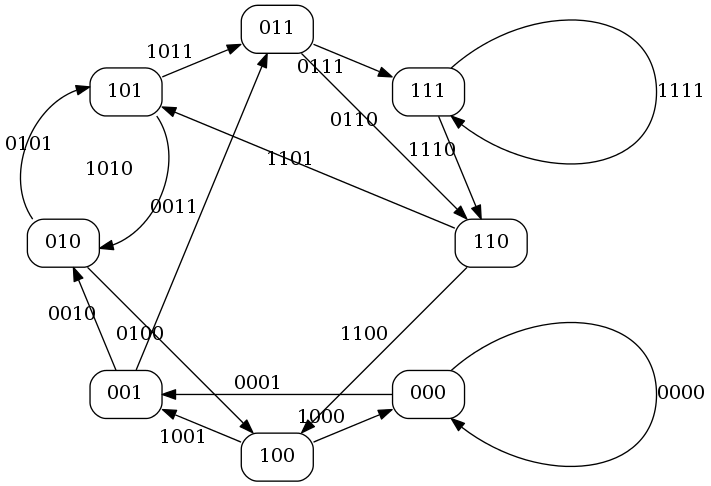

In [33]:
from IPython.display import Image
Image('TestGraph.png')